# Part II - (Prosper loan Explanatory Presentation)
## by (Chijioke Declan Obasi)

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.


>> The goal of this project is to find out answers to the questions below using some key selected variables or factors from the data set that have the possibilities or influence. So the main feature(s) i will be focusing on Borrower Rate, Borrower APR, Prosper Score, Original Loan Amount, Borrower Occupation, Lender Yield, Empolyment status.
 
####  Questions to be answered;
>1.Are there factors that could possibly affect the loan amount?
>2. What are the factors that possibly affect a loan’s outcome status?
>3. What factors or variables affects the borrower’s APR?
>4. what factors could affect the lender yield as well?




> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

>The dataset is about a company that issue credit loans to their clients. It provides information on how credit loans and other factors are used in accessing the the interest rates, pay back period and other financial implications of borrowers and how the lender (Company) benefit from the opportunity. the data set contained 113937 rows and 81 columns. Data dictionary to understand the variables more form this link: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
raw_data=pd.read_csv('prosperLoanData.csv')


In [3]:
# Taking out specific columns and data that i will be working with  
    
loan_data = raw_data.loc[:,('ListingCreationDate', 'Term','LoanStatus', 'ClosedDate','BorrowerAPR','BorrowerRate',
    'LenderYield','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','IncomeRange','StatedMonthlyIncome',
    'LoanMonthsSinceOrigination','LoanOriginalAmount','LoanOriginationDate','LoanOriginationQuarter',
    'MonthlyLoanPayment') ]

In [5]:
#Make a copy of the data frame
loan_data_clean = loan_data.copy()

#Adjust Datetime columns to appropriate dtypes
loan_data_clean.ListingCreationDate = pd.to_datetime(loan_data_clean.ListingCreationDate) 
loan_data_clean.ClosedDate = pd.to_datetime(loan_data_clean.ClosedDate)
loan_data_clean.LoanOriginationDate = pd.to_datetime(loan_data_clean.LoanOriginationDate)


loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ListingCreationDate         113937 non-null  datetime64[ns]
 1   Term                        113937 non-null  int64         
 2   LoanStatus                  113937 non-null  object        
 3   ClosedDate                  55089 non-null   datetime64[ns]
 4   BorrowerAPR                 113912 non-null  float64       
 5   BorrowerRate                113937 non-null  float64       
 6   LenderYield                 113937 non-null  float64       
 7   ProsperRating (Alpha)       84853 non-null   object        
 8   ProsperScore                84853 non-null   float64       
 9   ListingCategory (numeric)   113937 non-null  int64         
 10  BorrowerState               108422 non-null  object        
 11  Occupation                  110349 non-

In [6]:
#convert ProsperRating (Alpha) and  IncomeRange to ordinal categorical variables 
ordinal_var = {'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],\
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}
for var in ordinal_var:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var[var])
    loan_data_clean[var] = loan_data_clean[var].astype(ordered_var)
    
#convert oblect datatype for all other categorical columns
loan_data_clean['Occupation']= loan_data_clean['Occupation'].astype('category')
loan_data_clean['BorrowerState'] = loan_data_clean['BorrowerState'].astype('category')
loan_data_clean['LoanStatus'] = loan_data_clean['LoanStatus'].astype('category')
loan_data_clean['ListingCategory (numeric)'] = loan_data_clean['ListingCategory (numeric)'].astype('category')
loan_data_clean['EmploymentStatus'] = loan_data_clean['EmploymentStatus'].astype('category')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

## Loan Status Distribution Plot

> 1. The bar chart shows that half of the the loan borrowed are "current" and two-third of the remaining half are "Completed". This goes a long way to indicate that the company have a good active and structured system since two-third of the borrowers have active loan status or completed deals. This can be atributed to a good follow up or reminders (like sms messeages, emails) before due date. Also, loans having past dues were really low below 5%. 

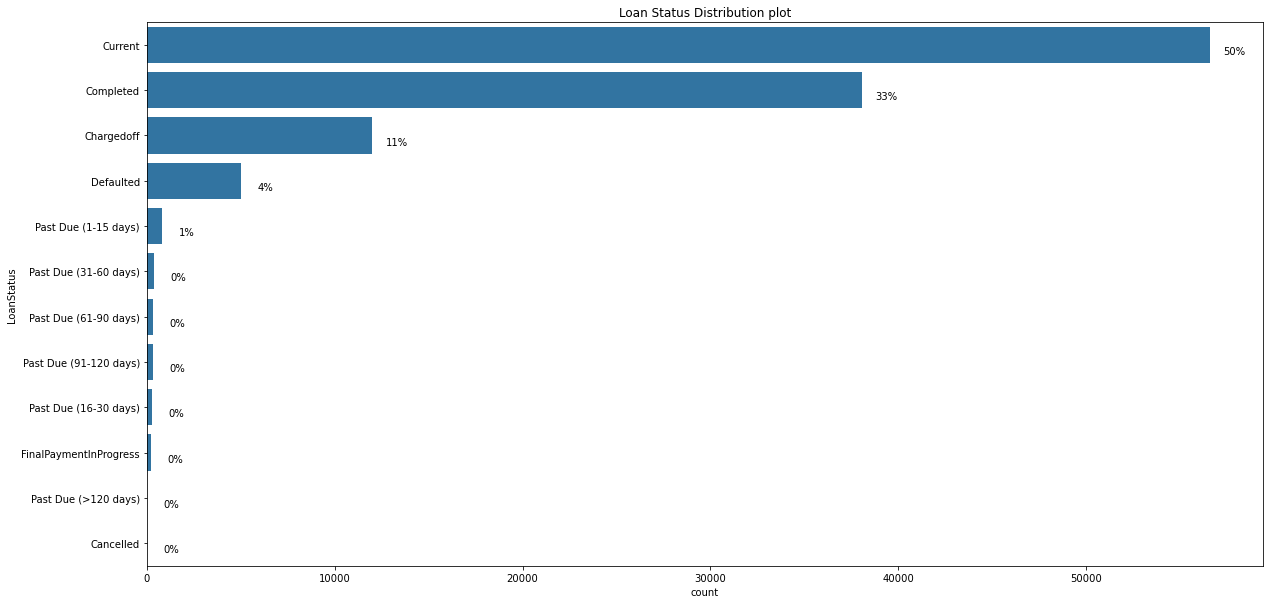

In [7]:
# Loan Status Distribution
plt.figure(figsize=[20, 10])
base_color= sb.color_palette()[0]
status_order = loan_data_clean['LoanStatus'].value_counts().index
sb.countplot(data=loan_data_clean,y='LoanStatus',color=base_color,order=status_order);
plt.title('Loan Status Distribution plot')

# logic to print the text (proportional) on the bars of the horizontal plot
n_points = loan_data_clean.shape[0]
cat_counts = loan_data_clean['LoanStatus'].value_counts()
locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    plt.text(count+1300, loc+0.2,  pct_string, ha = 'center', color = 'black');

## Borrower Employment Status Distrobution plot
> This plot gives a clear insight on the employment status of the borrower. it is a clear indication that most of the borrower are 59% employed meaning that they have a source of monthly income. Also this employed category of borrowers may have business online, work for companies, and so on. While having a few percentage of not-employed borrowers. This chart also correlate with that of the loan status, that is why majority of the loan are current and having few which are past due. 

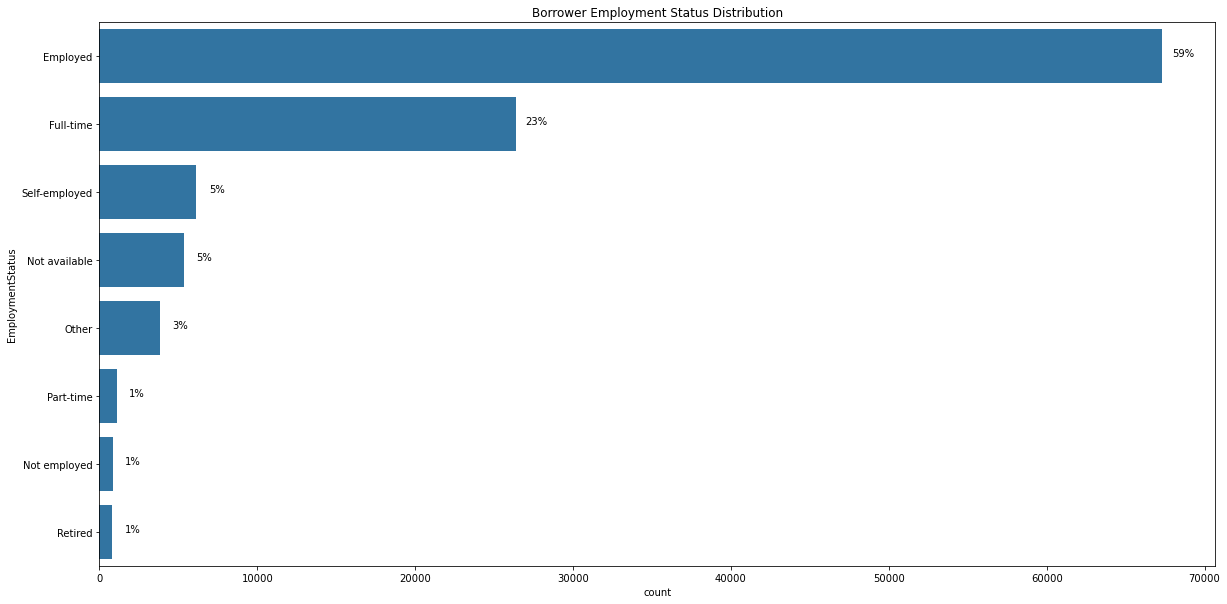

In [20]:
#Borrower Employment Status Distrobution
cat_order = loan_data_clean.EmploymentStatus.value_counts().index
plt.figure(figsize=[20, 10])
sb.countplot(data=loan_data_clean,y='EmploymentStatus',color=base_color, order=cat_order);
plt.title('Borrower Employment Status Distribution')

#
n_points = loan_data_clean.shape[0]
cat_counts = loan_data_clean['EmploymentStatus'].value_counts()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    plt.text(count+1300, loc,  pct_string, ha = 'center', color = 'black');

## Borrower Income Range Distribution plot

> The income range plays a vital factor in accessing whether the loan borrowed can be pay back within the stipulated term of loan. This bar chart gives a representation of the income range and it shows that majority of the income are '25,000 dollars to 74,999 dollars. With this income range and the employment status, most of the loans borrowed can be paid payback within the term of laons. Also, a very few percentage have income less than 25,000 dollars, which can be attributed to the reitred, not-available, part-time.

> Also, the ranges above the 74,000 dollars to 100,000 dollars,  can be assumed to some few of borrowers who are self employed or runs their own business. It is a clear fact that most business owners earn more, since the sole aim of every establishment is to make profit and that is why the counts are half of that of the 25,000 dollars to 49,999 dollars.

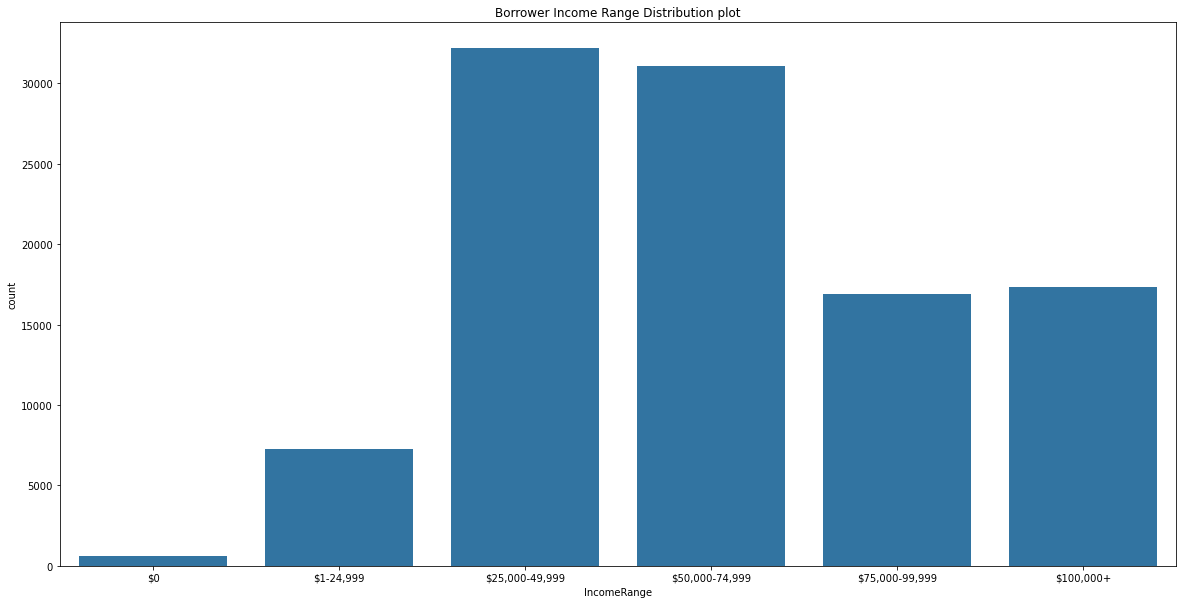

In [21]:
# plotting Borrower Income Range Distribution
plt.figure(figsize=[20,10])
sb.countplot(data = loan_data_clean, x='IncomeRange', color= base_color);
plt.title('Borrower Income Range Distribution plot')
plt.show;

## BorrowerAPR & EmploymentStatus plot
> On BorrowerAPR vs Employment graph we notice that not-employed have high rate compare to employed which have lower mean. This can be assumed that most of the not-employed people have their loan status as past dues, which can be as a result of not having an income or source to generate money on a monthly or annual basis. So, the interest rate would be way higher as additional charges would be placed on past dues. 

>Also, there is a large volume on the retired but it has a low mean, it can be assumed that though the number of retired people are few, but their interest rate is slightly high. This could be to the foloowing reasons: 
>> 1. Inconsistent monthly pension received 
>> 2. Ineffective communication system between the retired oand the lender establishment 
>> 3. Health issues since most of them in this category are aged, and many more

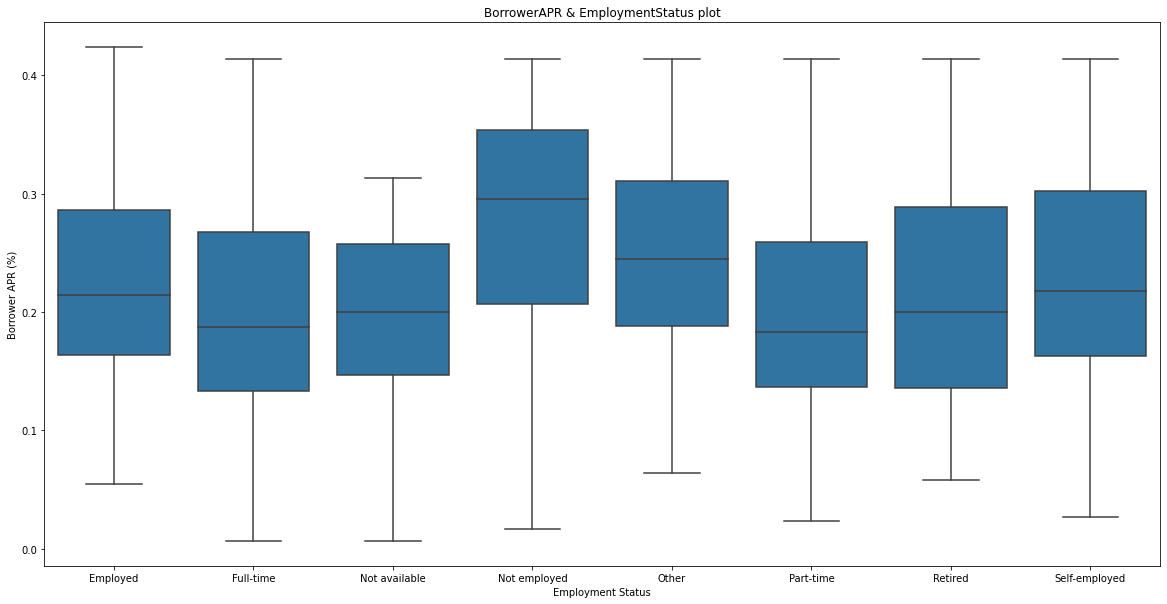

In [29]:
# plotting Borrower APR vs Employment status
plt.figure(figsize = [20, 10])

sb.boxplot(data=loan_data_clean,y='BorrowerAPR',x='EmploymentStatus',color=base_color);
plt.title('BorrowerAPR & EmploymentStatus plot');
plt.ylabel('Borrower APR (%)');
plt.xlabel('Employment Status');

## LoanOriginalAmount vs EmploymentStatus plot
> Most Employed people get larger loan amounts compared to all other categories. From the lenders point of view, it is a wise decision for the establishment to give piority to the employed people since they have a decent income range and monthly payment systems and can get their money back. Also,this relationship is true because as an employed person, there is level of confidence that one have of the capability of paying back the loan amount borrowed with set conditions given by the lender. On both parties, there i believe there is a level of trust.

> While comparing to the Not-employed, the loan amount are small. some basic rasons could be no assurance of when to pay back, request for a longer term of loan, not being able to meet the minimum reqiurement set by the lender for larger loan amount. 

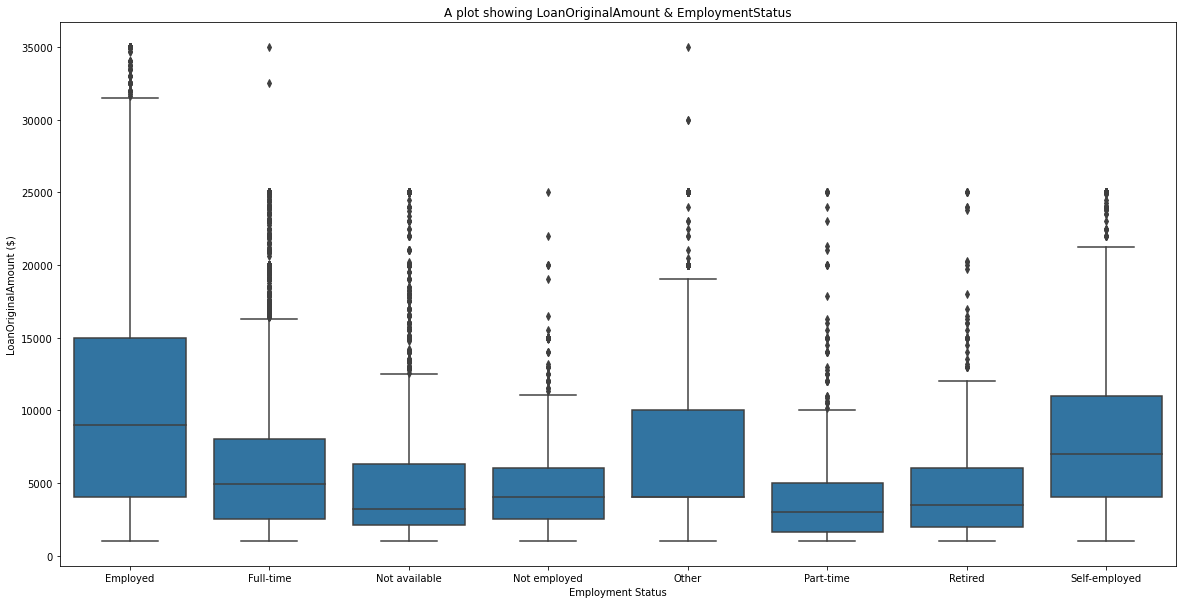

In [28]:
#ploting LoanOriginalAmount & EmploymentStatus
plt.figure(figsize = [20, 10])
sb.boxplot(data=loan_data_clean,y='LoanOriginalAmount',x='EmploymentStatus',color=base_color);
plt.ylabel('LoanOriginalAmount ($)');
plt.xlabel('Employment Status');
plt.title('A plot showing LoanOriginalAmount & EmploymentStatus')
plt.show();

## BorrowerAPR vs. ProsperScore & LoanOriginalAmount plot
> From the chart, most of the loans with higher amounts (>$20,000) are taken by people with higher prosper score (10 and above). This relationship gives an deeper understanding how the various amount of laon are being taken by people. It shows that the lender uses a metric score to grade it's client so as to know how their loans are been distributed. 

> Now people having a very prosper score(10 and above) falls in the category of collecting higher amounts of loan with a reduced interset rate. i assumed the motive for this, is to motivate their most prestigous client to access more loans there by reducing the interest rate. On the other note, loans with lower amounts (<$20,000) are taken by people with lower prosper score (10 and below) with high interest rate. this is reasonable from the lender point of view, that they will tend to make or equalized their earning with that of the higher loan takers after much calculations with their interest rate ratio.

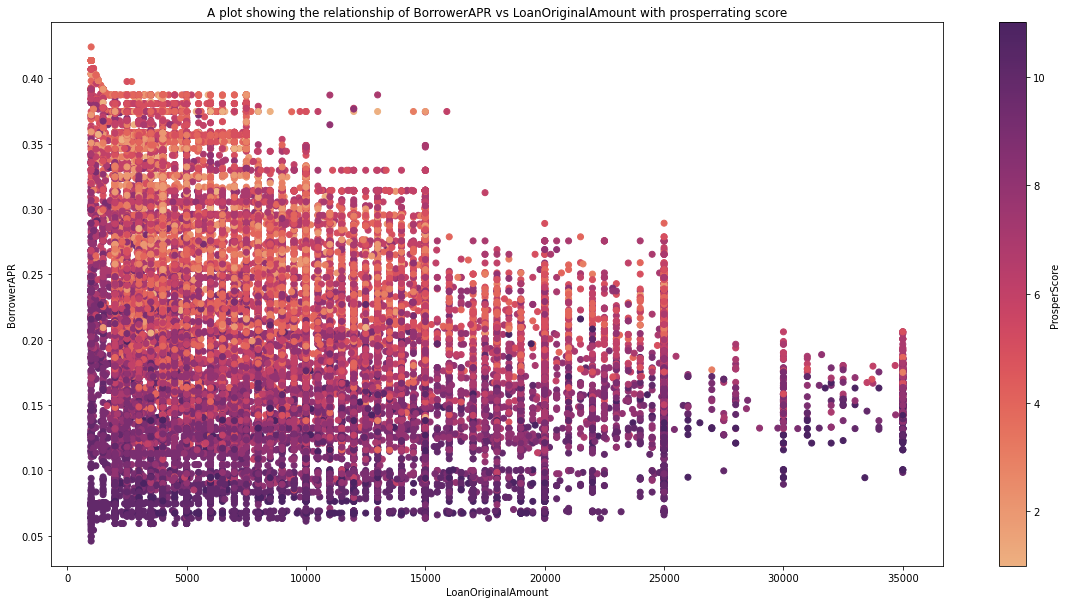

In [8]:
#plotting borrowerApr, prosperscore and loanOriginalAoumnt
plt.figure(figsize=[20, 10]) 
plt.scatter(data = loan_data_clean, c = 'ProsperScore', y = 'BorrowerAPR', x='LoanOriginalAmount', cmap='flare') 
plt.colorbar(label = 'ProsperScore')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR')
plt.title('A plot showing the relationship of BorrowerAPR vs LoanOriginalAmount with prosperrating score');

## LenderYield and Borrower APR  vs ProsperRating plot

> Clearly the relationship between all the variables of Borrower APR and Lender yield are directly positively correlated as when the interest borrowers pays more , the lender yield will increase. This correlation seems true because this is the avenue/medium the lender gets its profits or commission for services render. But it seems also that the Higher the prosper score, the lower will lower borrower apr and then the lender yield will also be low. This implies that, borrower with high prosper score whose loan amount are large pay low interest than borrower with low prosper score that pays high interest. 
 With this simple explanation, it is safe to assume that the lender yield should evenly spread across all classes of prosper score borrowers to avoid over burdened (on the low prosper score) and under pay (to the high prosper scores).
> 

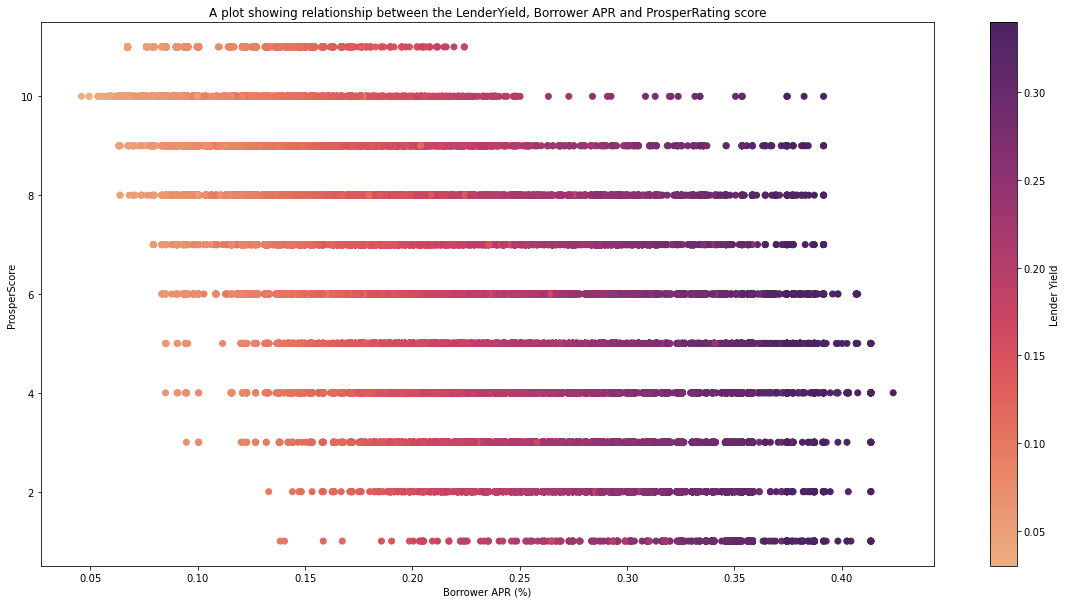

In [27]:
#ploting BorroweAPR, lender yield and prosperscore
plt.figure(figsize = [20, 10])
plt.scatter(data=loan_data_clean,c='LenderYield',x = 'BorrowerAPR',y='ProsperScore',cmap = 'flare')
plt.colorbar(label = 'Lender Yield')
plt.xlabel('Borrower APR (%)');
plt.ylabel('ProsperScore')
;
plt.title ('A plot showing relationship between the LenderYield, Borrower APR and ProsperRating score');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [9]:
!jupyter nbconvert Presentation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Presentation.ipynb to slides
[NbConvertApp] Writing 1359003 bytes to Presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Gues\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Gues\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Gues\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Gues\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Gues\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\Gues\an

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

In [ ]:
jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --template output-toggle.tpl
--post serve